<a id='Title-Multi-class-Classification'></a>
<h1 style="color:SlateGray;">Multi-class Classification</h1>

**Input dataset**

Reuters: set of short newswires with adjustable limit on max word count.

**Output classification**

Classifies into which of the 46 distict topic catagories each newswire belongs to.

<h2 style="color:SlateGray;">Background</h2>

**Layers**

[*Dense*](1_Image_Classification.ipynb#Layers-Dense)
		
**Activations**

[*relu*](1_Image_Classification.ipynb#Activations-relu)
		
[*softmax*](1_Image_Classification.ipynb#Activations-softmax)
		
**Optimizers**

[*rmsprop*](1_Image_Classification.ipynb#Optimizers-rmsprop)
		
**Loss functions**

[*categorical_crossentropy*](1_Image_Classification.ipynb#Loss-functions-categorical_crossentropy)

<h2 style="color:SlateGray;">Overview</h2>

Generalizes on the techniques covered in [*Binary Classification*](2_Binary_Classification.ipynb#Title-Binary-Classification) into single-label, multi-class classification.

The input data set consists of 8,982 training samples and 2,246 test samples, the associated labels range in integer values [0, 45]. This example encodes each newswire by the 10,000 most frequently used words. The training samples are partitioned to be 7,982 training and 1,000 validation, each sample is one-hot encoded.

In [1]:
import keras
print(keras.__version__)

Using TensorFlow backend.


2.2.2


In [22]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [23]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [32]:
from keras.utils.np_utils import to_categorical

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [26]:
from keras import models
from keras import layers

model1 = models.Sequential()
model1.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(46, activation='softmax'))
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_9 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_10 (Dense)             (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [27]:
model1.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
history1 = model1.fit(partial_x_train,
                      partial_y_train,
                      epochs=8,
                      batch_size=512,
                      validation_data=(x_val, y_val))

history1_dict = history1.history
history1_dict.keys()

Train on 7482 samples, validate on 1500 samples
Epoch 1/8
7482/7482 [==============================] - 2s 208us/step - loss: 2.5920 - acc: 0.4834 - val_loss: 1.7943 - val_acc: 0.5887
Epoch 2/8
7482/7482 [==============================] - 1s 117us/step - loss: 1.4784 - acc: 0.6820 - val_loss: 1.4219 - val_acc: 0.6933
Epoch 3/8
7482/7482 [==============================] - 1s 122us/step - loss: 1.1178 - acc: 0.7592 - val_loss: 1.2628 - val_acc: 0.7193
Epoch 4/8
7482/7482 [==============================] - 1s 120us/step - loss: 0.8912 - acc: 0.8083 - val_loss: 1.1435 - val_acc: 0.7467
Epoch 5/8
7482/7482 [==============================] - 1s 154us/step - loss: 0.7199 - acc: 0.8470 - val_loss: 1.0701 - val_acc: 0.7673
Epoch 6/8
7482/7482 [==============================] - 1s 132us/step - loss: 0.5823 - acc: 0.8764 - val_loss: 1.0371 - val_acc: 0.7713
Epoch 7/8
7482/7482 [==============================] - 1s 130us/step - loss: 0.4691 - acc: 0.9008 - val_loss: 1.0180 - val_acc: 0.7747
Epoch 8

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

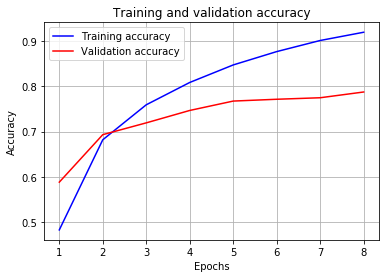

In [29]:
import matplotlib.pyplot as plt

acc = history1.history['acc']
val_acc = history1.history['val_acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.show()

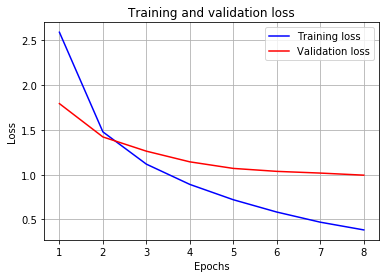

In [30]:
plt.clf()

loss = history1.history['loss']
val_loss = history1.history['val_loss']

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.show()

In [31]:
results = model1.evaluate(x_test, one_hot_test_labels)
print(results)

2246/2246 [==============================] - 0s 194us/step
[1.008714626011632, 0.7764915405695499]


In [18]:
model2 = models.Sequential()
model2.add(layers.Dense(46, activation='relu'))
model2.add(layers.Dense(46, activation='softmax'))

model2.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])

history2 = model2.fit(partial_x_train, partial_y_train,
           epochs=8,
           batch_size=128,
           validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 1s 169us/step - loss: 2.0840 - acc: 0.6089 - val_loss: 1.3505 - val_acc: 0.7160
Epoch 2/8
7982/7982 [==============================] - 1s 140us/step - loss: 1.0612 - acc: 0.7784 - val_loss: 1.0642 - val_acc: 0.7670
Epoch 3/8
7982/7982 [==============================] - 1s 138us/step - loss: 0.7579 - acc: 0.8391 - val_loss: 0.9333 - val_acc: 0.8030
Epoch 4/8
7982/7982 [==============================] - 1s 137us/step - loss: 0.5679 - acc: 0.8822 - val_loss: 0.8671 - val_acc: 0.8240
Epoch 5/8
7982/7982 [==============================] - 1s 140us/step - loss: 0.4318 - acc: 0.9116 - val_loss: 0.8560 - val_acc: 0.8250
Epoch 6/8
7982/7982 [==============================] - 1s 138us/step - loss: 0.3394 - acc: 0.9281 - val_loss: 0.8251 - val_acc: 0.8340
Epoch 7/8
7982/7982 [==============================] - 1s 140us/step - loss: 0.2738 - acc: 0.9380 - val_loss: 0.8150 - val_acc: 0.8380: 0s - l

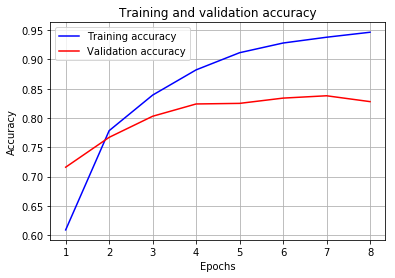

In [19]:
acc = history2.history['acc']
val_acc = history2.history['val_acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.show()

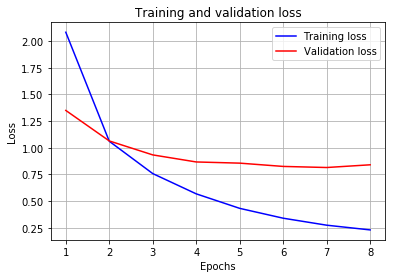

In [20]:
plt.clf()

loss = history2.history['loss']
val_loss = history2.history['val_loss']

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.show()

In [21]:
results = model2.evaluate(x_test, one_hot_test_labels)
print(results)

2246/2246 [==============================] - 0s 163us/step
[0.9227898553982443, 0.7996438112730229]
